# Hypothesis 3 Visualizations
## Is there a correlation between model years and car registrations, and what are the comparisons between BEVs and PHEVs?

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file
df = pd.read_csv("../data/full_vehicle_data.csv")
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181055 entries, 0 to 181054
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             181055 non-null  object 
 1   County                 181055 non-null  object 
 2   City                   181055 non-null  object 
 3   State                  181055 non-null  object 
 4   Postal Code            181055 non-null  int64  
 5   Model Year             181055 non-null  int64  
 6   Make                   181055 non-null  object 
 7   Model                  181055 non-null  object 
 8   Electric Vehicle Type  181055 non-null  object 
 9   Electric Range         181055 non-null  int64  
 10  Latitude               181055 non-null  float64
 11  Longitude              181055 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 16.6+ MB
None


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.54468,-122.374105


## Color Palette

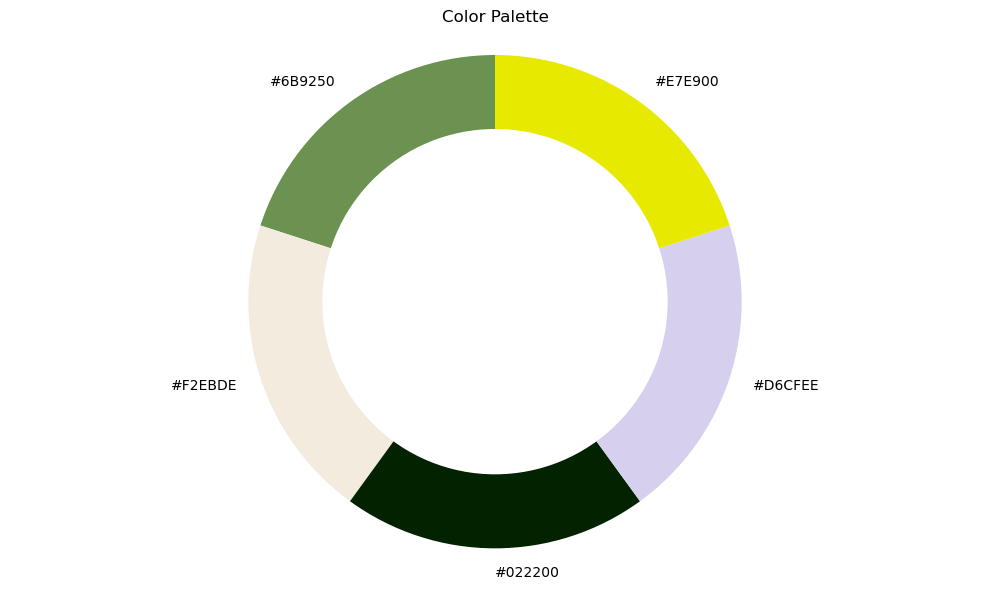

In [3]:
color_df = [10, 10, 10, 10, 10]
labels = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(color_df, labels=labels, startangle=90, colors=['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a white circle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Color Palette')

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Color Palette.png")
plt.show()

## Bar Chart - Hybrid vs Battery Electric Registrations

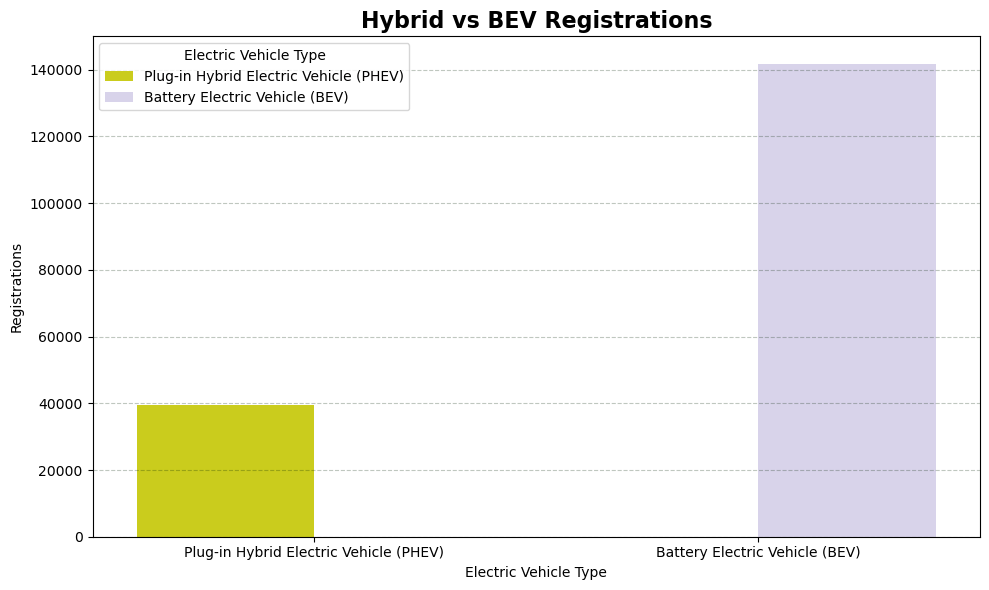

In [4]:
# Step 1: Get the data
# Create the plot
plt.figure(figsize=(10,6))
sns.countplot(x='Electric Vehicle Type', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

# Customizations
plt.title("Hybrid vs BEV Registrations", fontsize=16, fontweight="bold")
plt.ylim(0, 150000)
plt.ylabel('Registrations')

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.25)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Bar Chart - Hybrid vs Battery Electric Registrations.png")
plt.show()

## Bar Chart - Registrations of Model Years for Battery Electrics vs Hybrids

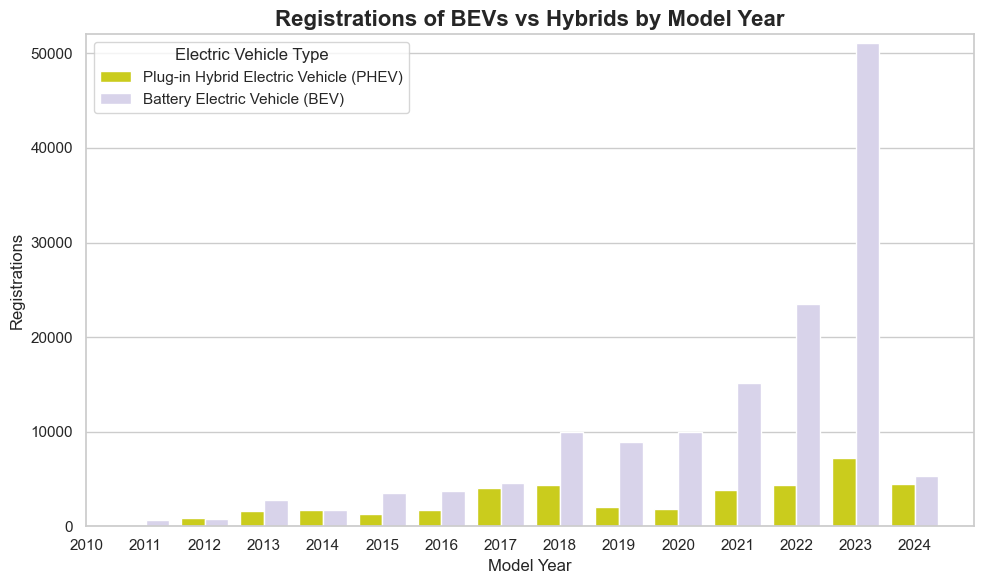

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

plt.title('Registrations of BEVs vs Hybrids by Model Year', fontsize=16, fontweight="bold")
plt.xlabel('Model Year')
plt.ylabel('Registrations')
plt.ylim(0, 52000)
plt.xlim(7, 22)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Bar Chart - Registrations of Model Years for Battery Electrics vs Hybrids.png")
plt.show()

In [6]:
mask = df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
bev_df = df.loc[mask].reset_index(drop=True)
bev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
1,5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012
2,5YJ3E1EB5L,Snohomish,Mountlake Terrace,WA,98043,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,47.784160,-122.308420
3,1G1FW6S03J,Snohomish,Bothell,WA,98021,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238,47.797727,-122.210730
4,5YJSA1S22F,King,Seattle,WA,98121,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,47.615460,-122.344125


In [7]:
mask = df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle (PHEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
hybrid_df = df.loc[mask].reset_index(drop=True)	
hybrid_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
2,1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
3,1C4JJXP66P,Thurston,Olympia,WA,98501,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),21,47.043535,-122.896920
4,1G1RA6S53H,Kitsap,Keyport,WA,98345,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),53,47.702126,-122.625012


## Histogram - Registrations of Battery Electric Vehicles (BEV) by Model Year

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


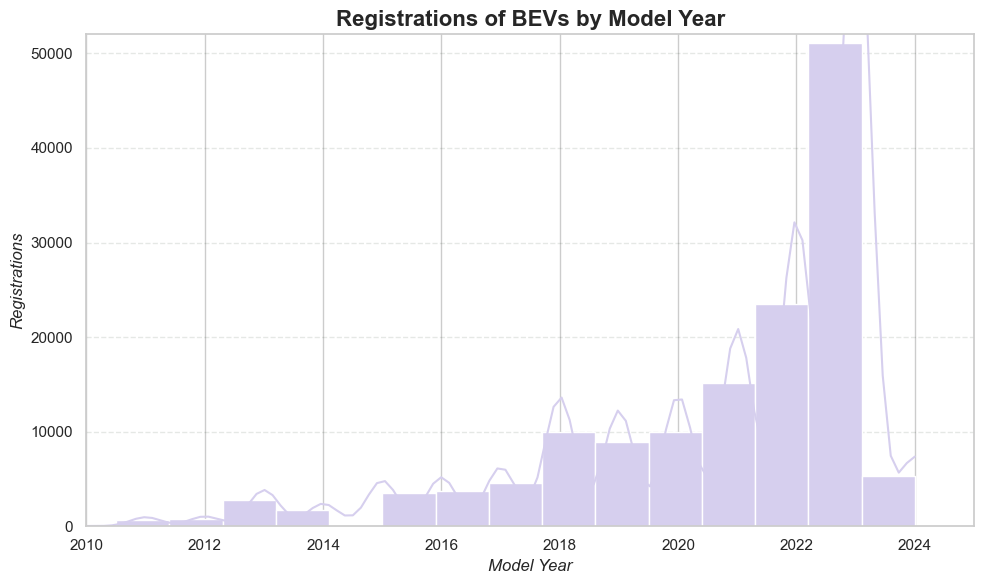

In [8]:
# Create the plot
x=bev_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, color='#D6CFEE', alpha=1, bins=30, kde=True)

# Customizations
plt.title("Registrations of BEVs by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 52000)
plt.xlim(2010, 2025)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram - Registrations of Battery Electric Vehicles (BEV) by Model Year.png")
plt.show()

## Histogram - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


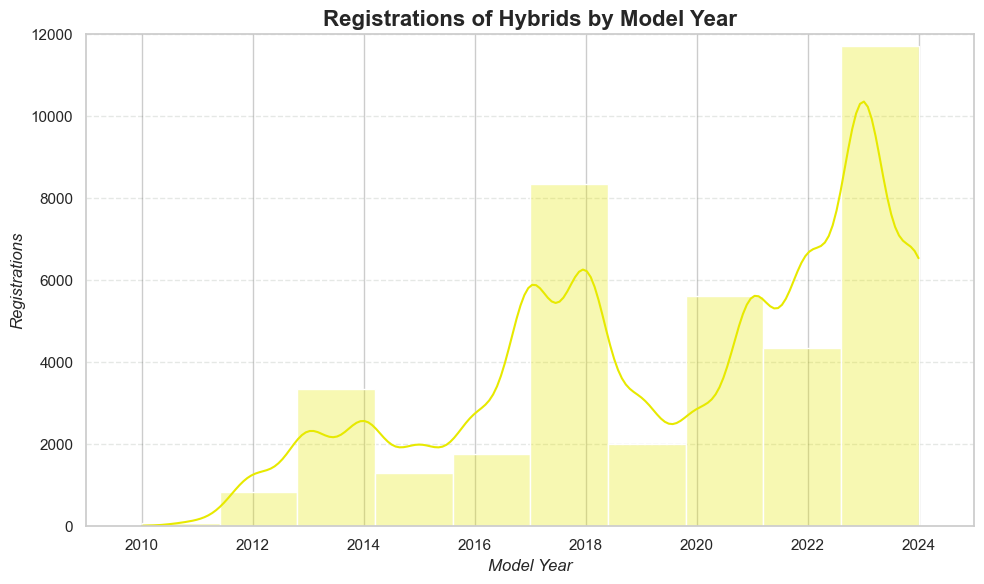

In [9]:
# Create the plot
x=hybrid_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=10, color="#E7E900", alpha=0.3, kde=True)

# Customizations
plt.title("Registrations of Hybrids by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 12000)
plt.xlim(2009, 2025)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year.png")
plt.show()

## Histogram - Registrations of BEVs vs Hybrids by Model Year

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


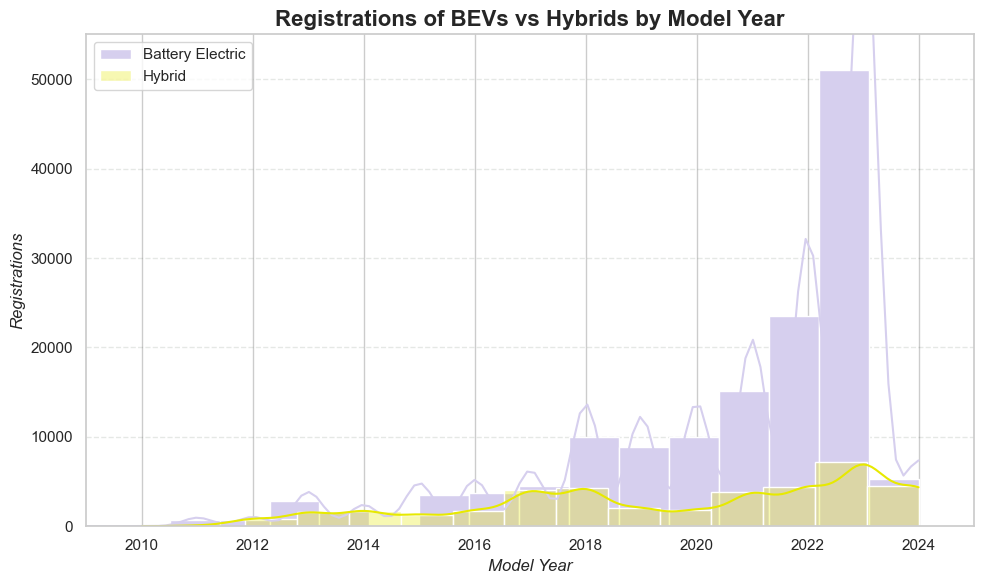

In [10]:
# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(x=bev_df['Model Year'], color='#D6CFEE', alpha=1, label='Battery Electric', bins=30, kde=True)
sns.histplot(x=hybrid_df['Model Year'], color='#E7E900', alpha=0.30, label='Hybrid', bins=15, kde=True)

# Customizations
plt.title("Registrations of BEVs vs Hybrids by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 55000)
plt.xlim(2009, 2025)
plt.legend()

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram - Registrations of BEVs vs Hybrids by Model Year.png")
plt.show()

## Violin Plot - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year

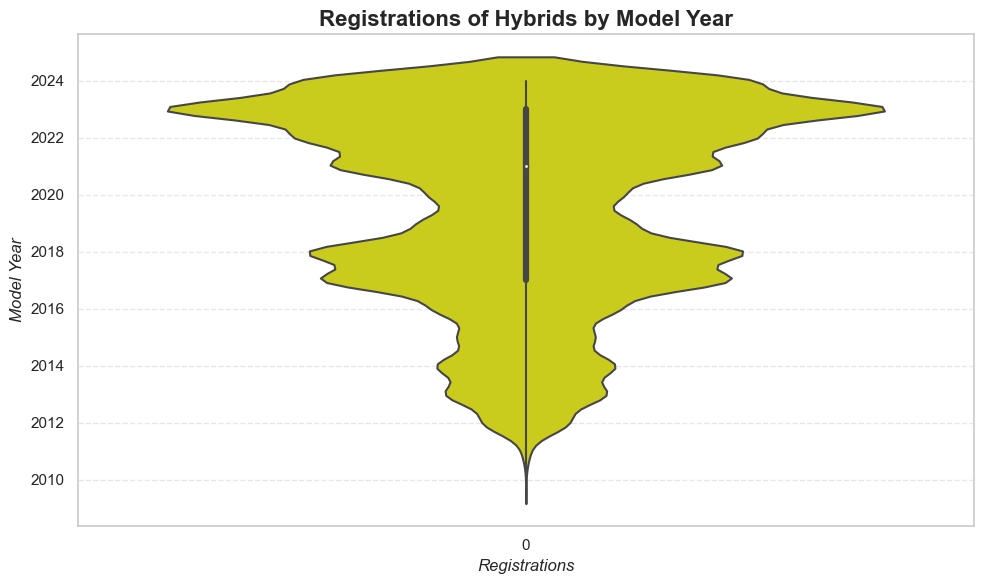

In [11]:
# Create the plot
y=hybrid_df['Model Year']
plt.figure(figsize=(10,6))
sns.violinplot(y, bins=10, color="#E7E900", alpha=0.3)

# Customizations
plt.title("Registrations of Hybrids by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylabel("Model Year", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Violin Plot - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year.png")
plt.show()

## Violin Plot - Registrations of Battery Electric Vehicles (BEV) by Model Year

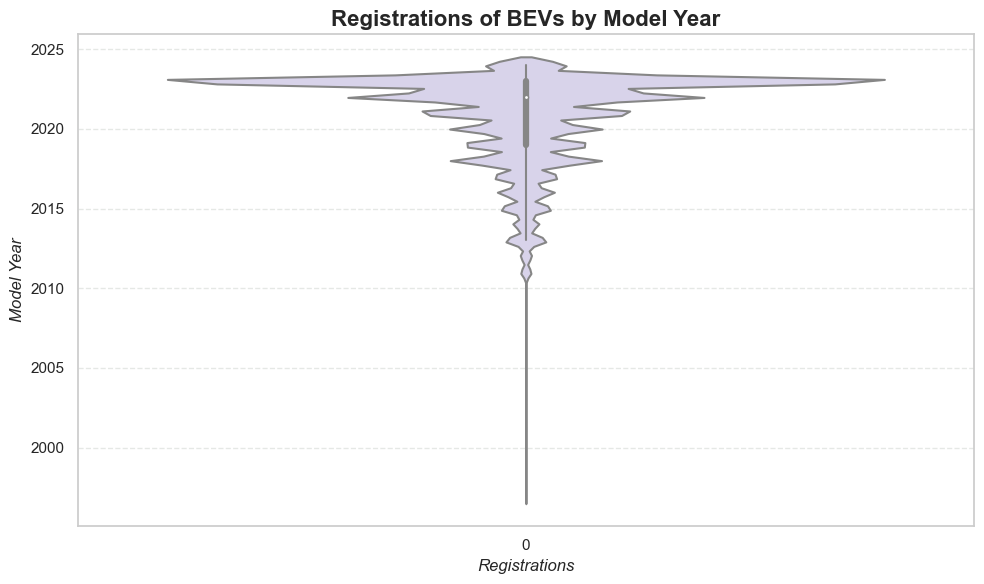

In [12]:
# Create the plot
y=bev_df['Model Year']
plt.figure(figsize=(10,6))
sns.violinplot(y, color='#D6CFEE', alpha=1)

# Customizations
plt.title("Registrations of BEVs by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylabel("Model Year", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Violin Plot - Registrations of Battery Electric Vehicles (BEV) by Model Year.png")
plt.show()